In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [2]:
output_path = "../suzuki16/output/"
params_path = "../suzuki16/param_list.dat"

names = ["name", "t0", "tE", "u0", "t_in", "t_out"]
dtype = ["U20", float, float, float, float, float]
params = np.genfromtxt(params_path, dtype=dtype, names=names)

array_paths = []
for i in range(params.shape[0]):
    array_paths.append(output_path+params["name"][i]+".npy")

In [3]:
i = 16
chi2_array = np.load(array_paths[i])
condition = chi2_array["chi2_flat"] > 3
chi2_array = chi2_array[np.where(condition)]
print(params["name"][i])

anom_cond1 = chi2_array["t0"]+3*chi2_array["teff"]>params["t_in"][i]
anom_cond2 = chi2_array["t0"]-3*chi2_array["teff"]<params["t_out"][i]

anom_ind = np.where(anom_cond1&anom_cond2)
flat_chi2_max = np.max(chi2_array["chi2_flat"][anom_ind])
zero_chi2_max = np.max(chi2_array["chi2_zero"][anom_ind])
print(flat_chi2_max)

base_cond1 = chi2_array["t0"]+3*chi2_array["teff"]<params["t_in"][i]
base_cond2 = chi2_array["t0"]-3*chi2_array["teff"]>params["t_out"][i]
base_ind = np.where(base_cond1 | base_cond2)
print(np.max(chi2_array["chi2_flat"][base_ind]))

MB11322
5865.360007062072
940.3009415754417


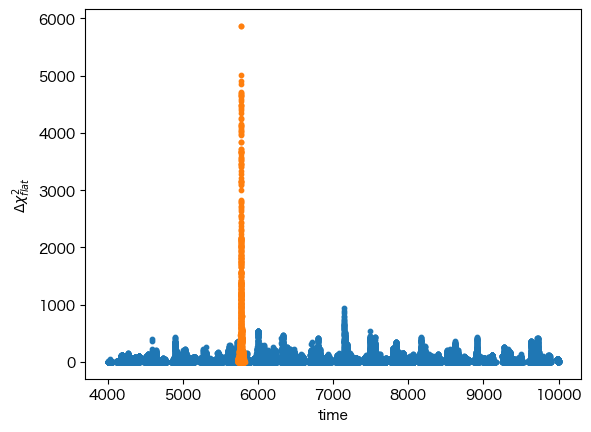

In [4]:
plt.scatter(chi2_array["t0"][base_ind],chi2_array["chi2_flat"][base_ind],s=10)
plt.scatter(chi2_array["t0"][anom_ind],chi2_array["chi2_flat"][anom_ind],s=10)
plt.xlabel("time")
plt.ylabel((r"$\Delta\chi^{2}_{flat}$"))

plt.show()

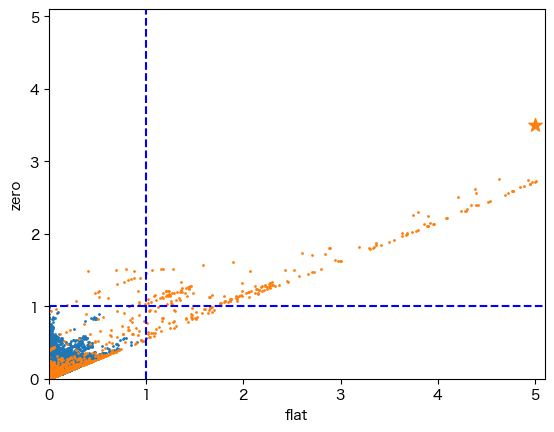

In [5]:
flat_lim, zero_lim =5,5

over_lim_num = 0
for i in range(params.shape[0]):
    if not i == 16:
        continue
    chi2_array = np.load(array_paths[i])
    condition = chi2_array["chi2_flat"] > 3
    condition2 = chi2_array["chi2_zero"] > 3
    chi2_array = chi2_array[np.where(condition&condition2)]

    anom_cond1 = chi2_array["t0"]+3*chi2_array["teff"]>params["t_in"][i]
    anom_cond2 = chi2_array["t0"]-3*chi2_array["teff"]<params["t_out"][i]

    anom_ind = np.where(anom_cond1&anom_cond2)
    flat_chi2_max = np.max(chi2_array["chi2_flat"][anom_ind])
    zero_chi2_max = np.max(chi2_array["chi2_zero"][anom_ind])

    base_cond1 = chi2_array["t0"]+3*chi2_array["teff"]<params["t_in"][i]
    base_cond2 = chi2_array["t0"]-3*chi2_array["teff"]>params["t_out"][i]
    base_ind = np.where(base_cond1 | base_cond2)
    
    flat_bunbo = np.max(chi2_array["chi2_flat"][base_ind])
    zero_bunbo = np.max(chi2_array["chi2_zero"][base_ind])

    plt.scatter(chi2_array["chi2_flat"][base_ind]/flat_bunbo,chi2_array["chi2_zero"][base_ind]/zero_bunbo,s=1,zorder=1,c="C0")
    plt.scatter(chi2_array["chi2_flat"][anom_ind]/flat_bunbo,chi2_array["chi2_zero"][anom_ind]/zero_bunbo,s=1,zorder=1,c="C1")
    
    cond1, cond2 = flat_chi2_max/flat_bunbo > flat_lim, zero_chi2_max/zero_bunbo > zero_lim
    if cond1 and cond2:
        over_lim_num += 1
    elif cond1:
        plt.scatter(flat_lim,zero_chi2_max/zero_bunbo,marker="*",s=100,zorder=2,c="C1")
    elif cond2:
        plt.scatter(flat_chi2_max/flat_bunbo,zero_chi2_max/zero_bunbo,marker="*",s=100,zorder=2,c="C1")
    else:
        plt.scatter(flat_chi2_max/flat_bunbo,zero_chi2_max/zero_bunbo,marker="*",s=100,zorder=2,c="C1")

    plt.axvline(x=np.max(chi2_array["chi2_flat"][base_ind])/flat_bunbo, color='b', linestyle='--')
    plt.axhline(y=np.max(chi2_array["chi2_zero"][base_ind])/zero_bunbo, color='b', linestyle='--')

#     if over_lim_num:
#         plt.text(flat_lim,zero_lim,f"{over_lim_num}",fontsize=12, color='C1', ha='center', va='center')

    plt.xlabel("flat")
    plt.ylabel("zero")

    plt.xlim(0,flat_lim+0.1)
    plt.ylim(0,zero_lim+0.1)
    # plt.legend()
    plt.show()

5 MB09266 1.9838929546199084 169.12586497329946
10 MB10353 1.9855672165113796 68.66002617868105
12 MB11028 3.580052279910831 812.2484964613072
15 MB11291 0.6191697245718748 -85.7113349533683
18 MB12288 1.4085724621619946 8134.16598592815
20 MB12505 1.8662710139480025 139.87322588197983


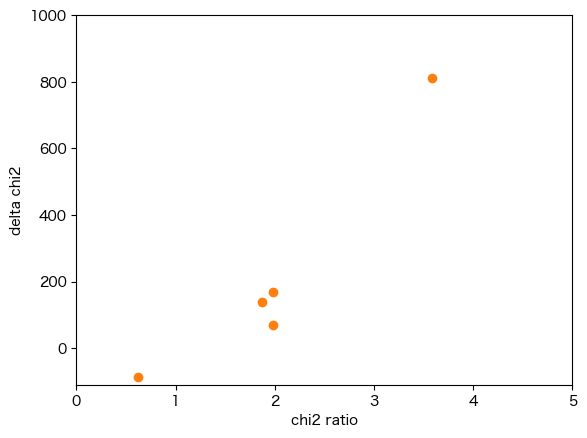

In [6]:
for i in range(params.shape[0]):
    chi2_array = np.load(array_paths[i])
    
#     if i ==10:
#         chi2_array = chi2_array[np.where(chi2_array["t0"]<6000)]

    anom_cond1 = chi2_array["t0"]+3*chi2_array["teff"]>params["t_in"][i]
    anom_cond2 = chi2_array["t0"]-3*chi2_array["teff"]<params["t_out"][i]
    anom_ind = np.where(anom_cond1&anom_cond2)
    
    base_cond1 = chi2_array["t0"]+3*chi2_array["teff"]<params["t_in"][i]
    base_cond2 = chi2_array["t0"]-3*chi2_array["teff"]>params["t_out"][i]
    base_ind = np.where(base_cond1 | base_cond2)
    
    flat_chi2_max = np.max(chi2_array["chi2_flat"][anom_ind])
    flat_bunbo = np.max(chi2_array["chi2_flat"][base_ind])
    
    plt.scatter(flat_chi2_max/flat_bunbo,flat_chi2_max-flat_bunbo,c="C1")
    
    if flat_chi2_max/flat_bunbo < 5:
        print(i,params["name"][i],flat_chi2_max/flat_bunbo,flat_chi2_max-flat_bunbo)

plt.ylim(-110,1000)
plt.xlim(0,5)

plt.xlabel("chi2 ratio")
plt.ylabel("delta chi2")
plt.show()

78.02020084816776
5853.053810406521
83331.69081936825
2710.1049906182384
3161.5121769487105
341.0204437271794
9182.653537298416
2996.3000794428845
39630.56000039501
182169.83002873417
138.32551933674034
7973.251267741507
1127.0671157527656
307920.4188941901
780.8153662781988
139.35305851433213
5865.360007062072
20002.17291326869
28042.91348908964
5990.725677831575
301.33912238532935
602.1479664468441


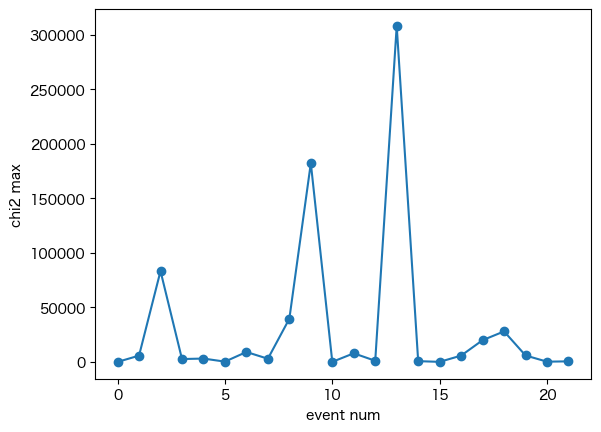

In [7]:
base_max = []
for i in range(params.shape[0]):
    chi2_array = np.load(array_paths[i])
    

    anom_cond1 = chi2_array["t0"]+3*chi2_array["teff"]>params["t_in"][i]
    anom_cond2 = chi2_array["t0"]-3*chi2_array["teff"]<params["t_out"][i]
    anom_ind = np.where(anom_cond1&anom_cond2)
    
    base_cond1 = chi2_array["t0"]+3*chi2_array["teff"]<params["t_in"][i]
    base_cond2 = chi2_array["t0"]-3*chi2_array["teff"]>params["t_out"][i]
    base_ind = np.where(base_cond1 | base_cond2)
    
    flat_chi2_max = np.max(chi2_array["chi2_flat"][anom_ind])
    flat_bunbo = np.max(chi2_array["chi2_flat"][base_ind])
    
    base_max.append(flat_chi2_max)
    print(flat_chi2_max)
    
plt.plot(base_max,marker="o")

plt.xlabel("event num")
plt.ylabel(f"chi2 max")

plt.show()